
# Preprocessing 
### This Notebook takes an image and the output is the binarized Image with horizontal staff lines
### It takes care of the enhancement of the image and choosing apropriate threshold


In [6]:
from commonfunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


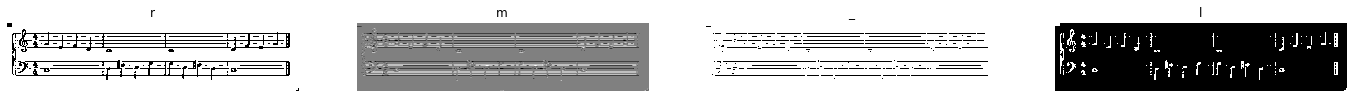

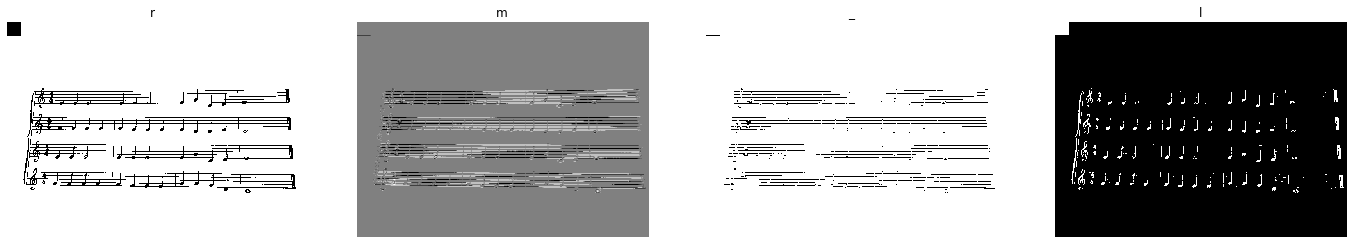

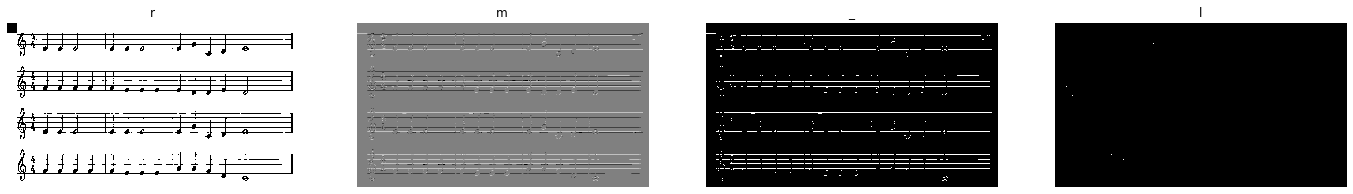

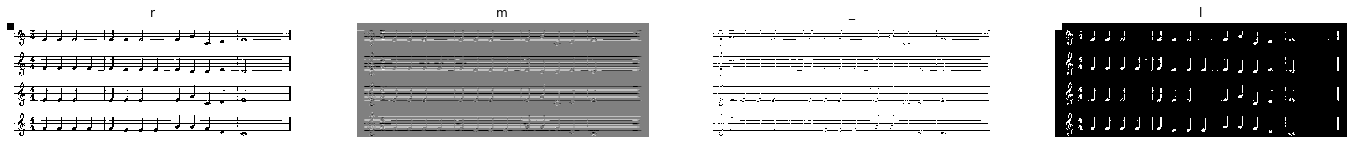

In [24]:
def rotate_img(image):
    new = np.array(np.where(image>0,0,1))
    tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
    origin = np.array((0,new.shape[1]))
    h, theta, d = hough_line(new, theta=tested_angles)
    th  = 0
#     ig, axes = plt.subplots(1, 3, figsize=(15, 6))
#     ax = axes.ravel()
#     ax[0].imshow(new, cmap=cm.gray)
    peaks = list(zip(*hough_line_peaks(h, theta, d)))
    _, angle, dist = np.median(peaks,axis = 0)
    y0,y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    th = math.atan((y1 - y0 )/(origin[1]))
#         ax[0].plot(origin, (y0,y1), '-r')
    if math.degrees(th) > 5 or math.degrees(th)< -5: 
        return np.where(binarize(rotate(new,math.degrees(th),preserve_range= True))>0,0,1)
    return np.where(new>0,0,1)
   

h_m =  [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
def binarize(img):
    thr = threshold_otsu(img)
    return np.where(img > thr,1,0)

paths = [ '../../bex2.png', '../../bex3.png', '../../bex4.png', '../../bex5.png']
#paths = [ '../../bex4.png']
k = 1
for p in paths:
    img = io.imread(p)
    gray = rgb2gray(img)
    gray = (gray*255).astype('uint8')
    org = binraization(gray)
    # org = rotate_img(org)
    new = convolve(org, h_m, mode='constant', cval=0.0)
    binary = binarize(new)
    done = binary * np.where(org>0,0,1)
    show_images([org,new,binary,done],'rm_lines')

In [10]:
from scipy.signal import find_peaks
def getStuffLines(bin_img):
    hist = np.zeros(bin_img.shape[0])
    for i in range(bin_img.shape[0]):
        hist[i] = np.sum(np.where(bin_img[i,:]>0,0,1))
    # plt.figure()
    # plt.plot(np.arange(0,bin_img.shape[0],1),hist,label = 'hist')
    peaks, _ = find_peaks(hist, height = bin_img.shape[0]//2,distance=7)
    np.diff(peaks)
    # plt.plot(peaks, hist[peaks], "x")
    # plt.show()
    return peaks
def get_obj_properties(obj_y,img):
    stuff_lines_pos = getStuffLines(img)
    print(stuff_lines_pos)
    # get differece between object and lines
    diff = stuff_lines_pos - obj_y
    # get min difference disregarding the sign
    min_pos = np.where(np.absolute(diff) == np.min(np.absolute(diff)))
    #git closes line position
    closest_line_pos= stuff_lines_pos[min_pos]
    #get line above if negative and below if positive 
    sign = diff[min_pos]# distance between top of obejct and nearest line
    closest_line_num = np.where(stuff_lines_pos == closest_line_pos)[0]+1
    closest_line_num = closest_line_num[0]
    return closest_line_num, closest_line_pos, sign

img = io.imread('../../bex2.png')
gray = rgb2gray(img)
gray = (gray*255).astype('uint8')
org = binraization(gray)
obj_min_y = 22  # min y in contour 
obj_max_y = 40  # max y in contour
obj_type = 'reverse first type'

closest_line_num_top, closest_line_pos_top, sign_top= get_obj_properties(obj_min_y,org)
closest_line_num_d, closest_line_pos_d, sign_d= get_obj_properties(obj_max_y,org)

# print(closest_line_num_top)
# print(closest_line_pos_top) 
# print(sign_top) 

# print(closest_line_num_d)
# print(closest_line_pos_d) 
# print(sign_d)  

def get_org_txt(obj_type, closest_line_num_d, closest_line_pos_d, sign_d):
    if obj_type == 'first type':
        if sign_top  > 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0:#if obj top above line and object bottom on line 
            return 'a'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0: #if obj top above line and object bottom below line 
            return 'g'
        elif sign_top  == 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom on line 
            return 'f'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'e'   
        elif sign_top  == 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom below line 
            return 'd' 
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 3 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'c' 
    elif obj_type == 'reverse first type':
        if sign_top  > 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 3 == 0:#if obj top above line and object bottom on line 
            return 'b2  '
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 3 == 0:#if obj top above line and object bottom on line 
            return 'a2  '
        elif sign_top  > 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0:#if obj top above line and object bottom on line 
            return 'g2'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0: #if obj top above line and object bottom below line 
            return 'f2'
        elif sign_top  == 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom on line 
            return 'e2'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'd2'   
        elif sign_top  == 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom below line 
            return 'c2' 
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 3 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'b' 
    
org_txt = get_org_txt(obj_type,closest_line_num_d, closest_line_pos_d, sign_d)
print(org_txt)









FileNotFoundError: No such file: 'C:\Users\eslam\Desktop\IP project\bex2.png'

In [7]:
def binraization(img,n=8,t=15):

    outputimg = np.zeros(img.shape)
    intimg = np.zeros(img.shape)
    h = img.shape[1]
    w = img.shape[0]
    s= min(w,h)//n
    count = s**2
    img = np.pad(img,s,"constant")
    intimg = np.cumsum(img ,axis =1)
    intimg = np.cumsum(intimg ,axis =0)
    a = np.roll(intimg,-s//2,axis =0)
    a = np.roll(a,-s//2,axis =1)
    a[:,-s//2:]=a[-s//2-1,-s//2-1]
    a[-s//2:,:]=a[-s//2-1,-s//2-1]
    b = np.roll(intimg,s//2+1,axis =0)
    b = np.roll(b,-s//2,axis =1)
    b[0:s//2+1,:]=0
    b[:,-s//2:]=0
    
    c = np.roll(intimg,s//2+1,axis =1)
    c = np.roll(c,-s//2,axis =0)
    c[:,0:s//2+1]=0
    c[-s//2:,:]=0
    
    d = np.roll(intimg,s//2+1,axis =0)
    d = np.roll(d,s//2+1,axis =1)
    d[0:s//2+1,:]=0
    d[:,0:s//2+1]=0

    sum = (a-b-c+d)*(100-t)/100
    outputimg = (img>sum/count)*255
    return outputimg[s:-s,s:-s]

In [6]:
def getRefLengths(img):
    cols = img.shape[1]
    rows = img.shape[0]
    hist = np.zeros((rows,rows), dtype=np.uint32)
    
    for i in range(0, cols):
        a = img[:,i]
        starts = np.array((a[:-1] == 1) & (a[1:] == 0))
        starts_ix = np.where(starts)[0] + 2
        ends = np.array((a[:-1] == 0) & (a[1:] == 1))
        ends_ix = np.where(ends)[0] + 2
        s1 = starts_ix.size
        s2 = ends_ix.size
        if s2 > s1:
            starts_ix = np.pad(starts_ix,(s2-s1,0), mode='constant', constant_values=(1))
        elif s1 > s2:
            ends_ix = np.pad(ends_ix,(0,s1-s2), mode='constant', constant_values=(a.size + 1))
        elif s1 > 0 and s2 > 0 and starts_ix[0] > ends_ix[0]:
            starts_ix = np.pad(starts_ix,(1,0), mode='constant', constant_values=(1))
            ends_ix = np.pad(ends_ix,(0,1), mode='constant', constant_values=(a.size + 1))
            
        l0 = ends_ix - starts_ix
        starts_ix1 = np.pad(starts_ix[1:],(0,1), mode='constant', constant_values=(a.size + 1)) 
        l1 = starts_ix1 - (starts_ix + l0)
        for i in range(s1):
            hist[l0[i], l1[i]] += 1
       
    hist[:,0] = 0
    mx = np.max(hist)
    ind = np.where(hist == mx)
    return ind[0][0], ind[1][0]
  

In [279]:
def deleteLines(binary,w):
    theta = np.arange(-math.pi,math.pi,0.01)
    max_R = math.sqrt(binary.shape[0]**2 +  binary.shape[1]**2)
    vote_mat = np.zeros((int(theta.size),int(round(max_R))))
    for row in range(binary.shape[0]):
        for col in range(binary.shape[1]):
             if binary[row,col]==1:
                for i in range(theta.size):
                    R = math.cos(theta[i]) * col + math.sin(theta[i]) * row
                    if  R < int(round(max_R)) and R >= 0:
                        vote_mat[i,int(R)]+=1
    for j in range(vote_mat.shape[0]):
        for k in range(vote_mat.shape[1]):
            if vote_mat[j,k] > 100:
                thval = theta[j]
                rval = k
                for i in range(binary.shape[1]):
                    x1 = i
                    y1 = int(round((rval - math.cos(thval)*x1)/ math.sin(thval)))
                    if not binary[y1-w:y1,x1].all() and not binary[y1:y1+w,x1].all():
                        binary[y1,x1] = 0
    show_images([binary],['line removed'])
    return binary

In [280]:
paths = ['../../ex1.png', '../../ex2.png', '../../ex3.png', '../../ex4.png', '../../ex5.png']
for i in paths:
# i = '../../ex4.png'
    img = sk.img_as_ubyte(rgb2gray(io.imread(i)))
    imgb = binraization(img)
    img = getStaffLines(imgb)
    show_images([img])

#     thr = fr.threshold_otsu(img)
#     binary = np.where(img>thr, 1, 0)
#     lines_rv = deleteLines(binary,3)
#     staffHeight, spaceHeight = getRefLengths(binary)


FileNotFoundError: No such file: '/mnt/e/kollea/imageProcessing/ex1.png'

time: 1.6854910850524902 seconds


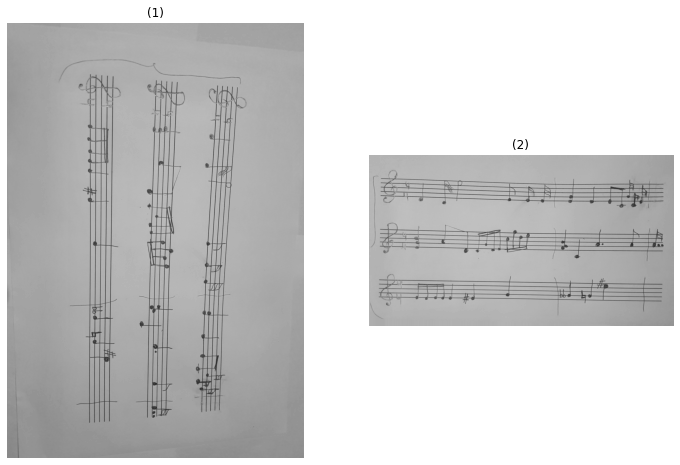

---------------------------------------------------------
time: 1.7911770343780518 seconds


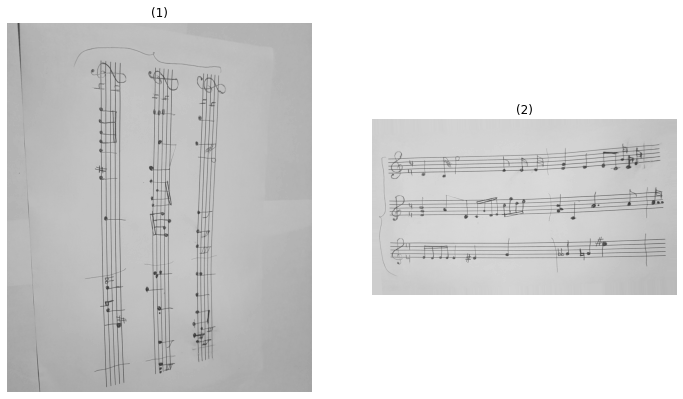

---------------------------------------------------------
time: 1.3104941844940186 seconds


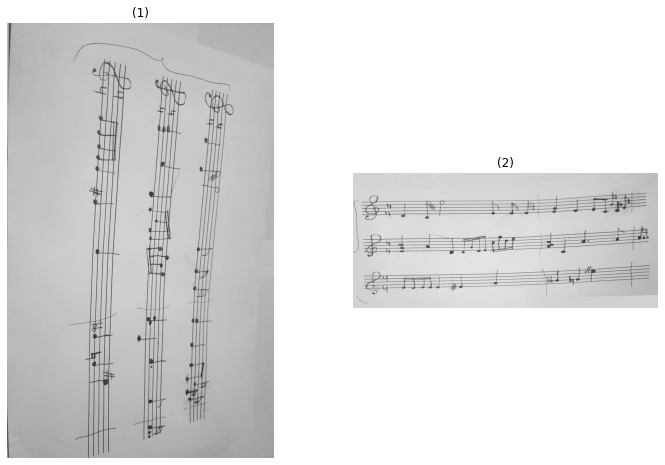

---------------------------------------------------------
time: 1.214749813079834 seconds


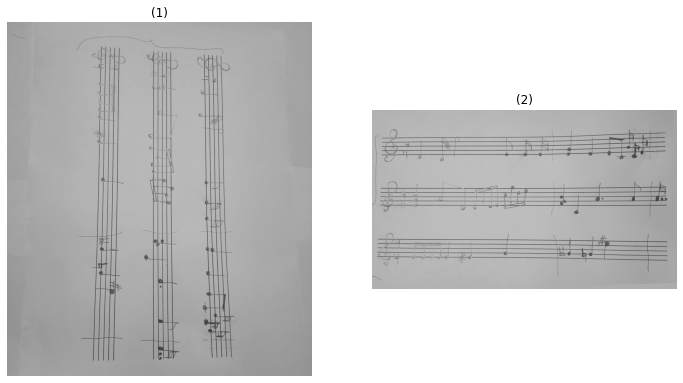

---------------------------------------------------------
time: 1.0930545330047607 seconds


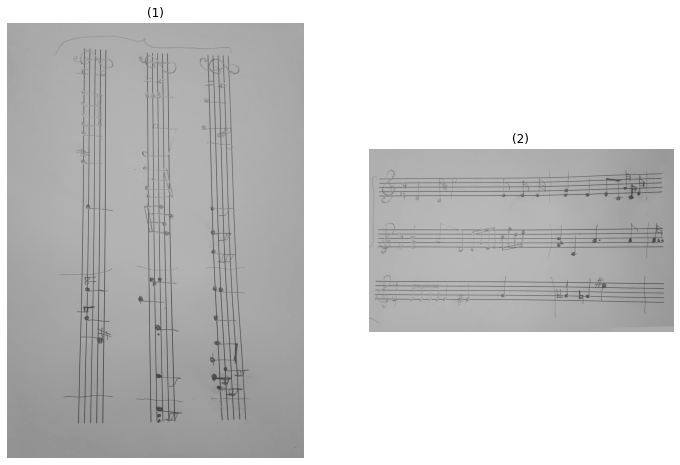

---------------------------------------------------------
time: 0.9325041770935059 seconds


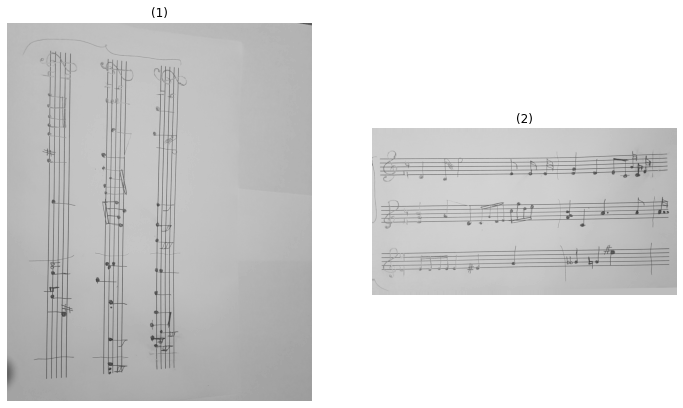

---------------------------------------------------------
time: 1.2077713012695312 seconds


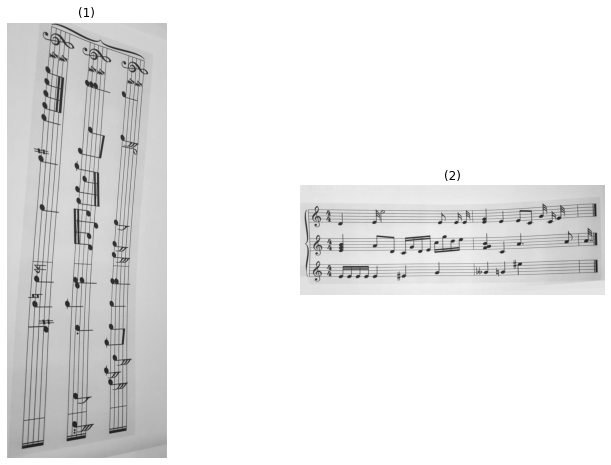

---------------------------------------------------------
time: 1.5677778720855713 seconds


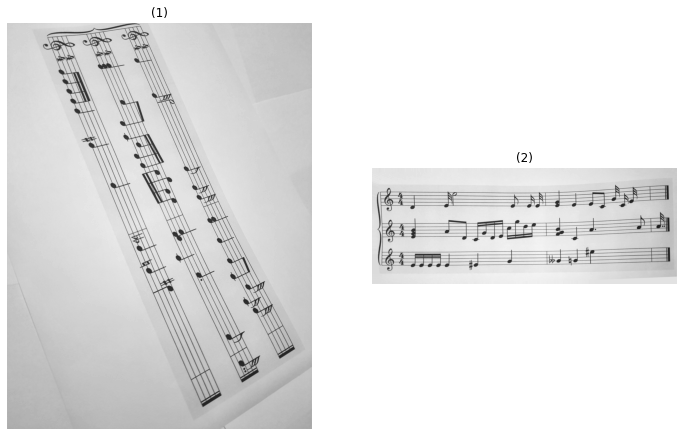

---------------------------------------------------------
time: 1.2237253189086914 seconds


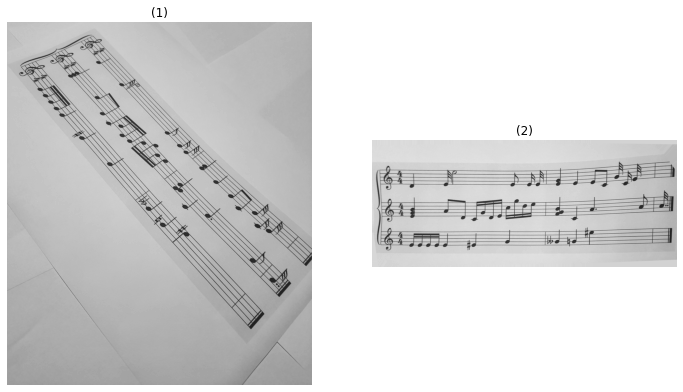

---------------------------------------------------------
time: 1.0202665328979492 seconds


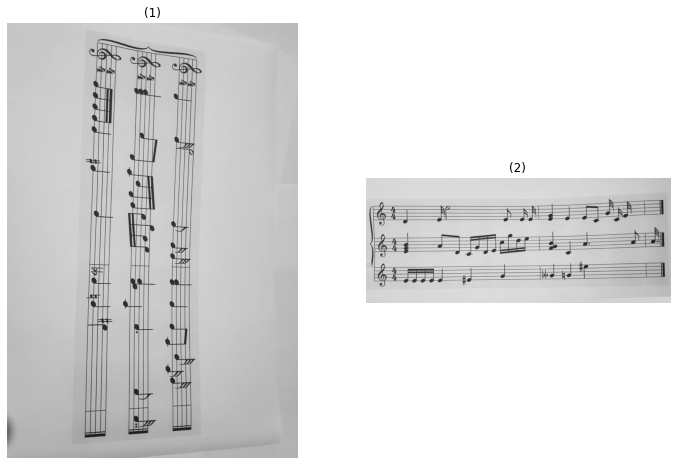

---------------------------------------------------------
time: 1.0491611957550049 seconds


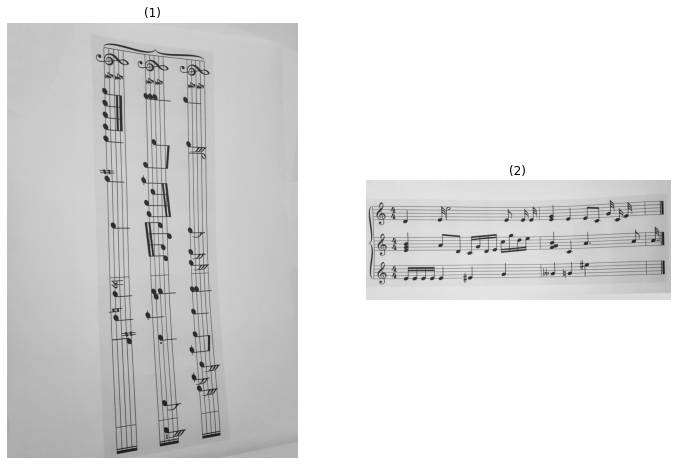

---------------------------------------------------------
time: 1.2027480602264404 seconds


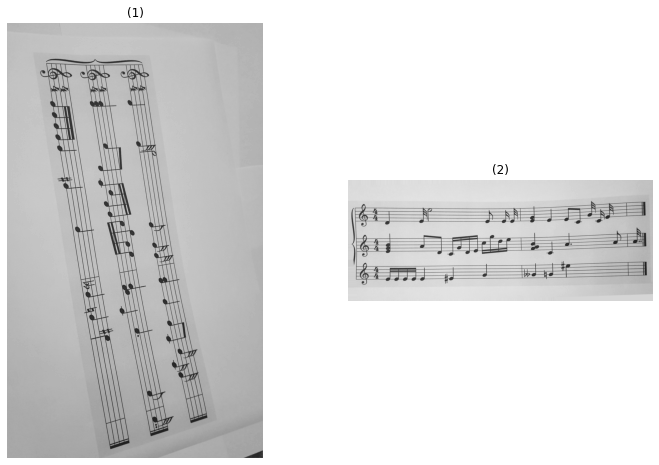

---------------------------------------------------------
time: 0.9963300228118896 seconds


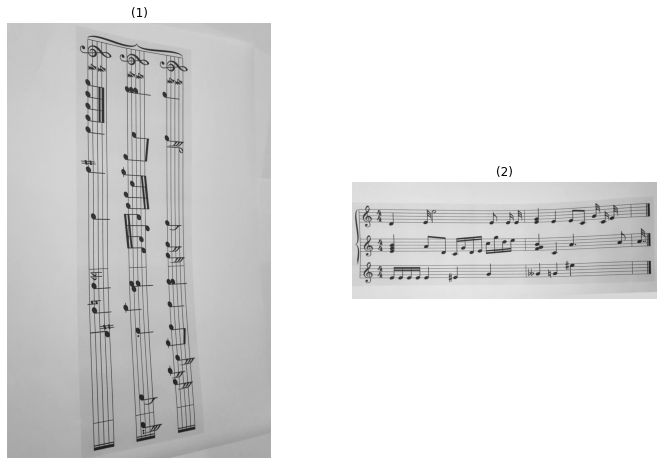

---------------------------------------------------------
time: 0.9863626956939697 seconds


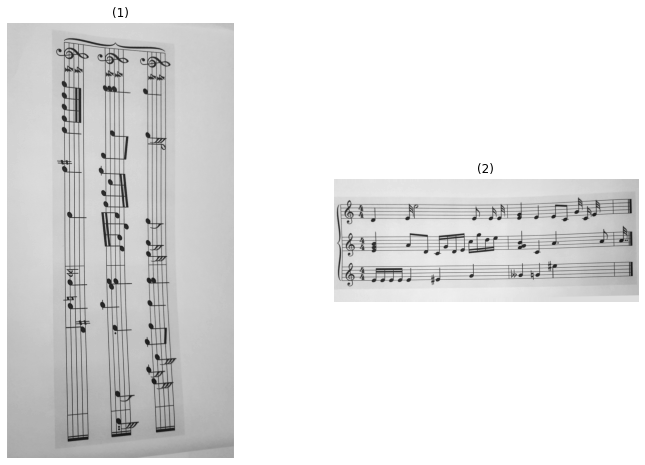

---------------------------------------------------------
time: 0.2323470115661621 seconds


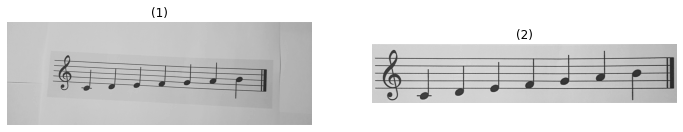

---------------------------------------------------------
time: 0.2074439525604248 seconds


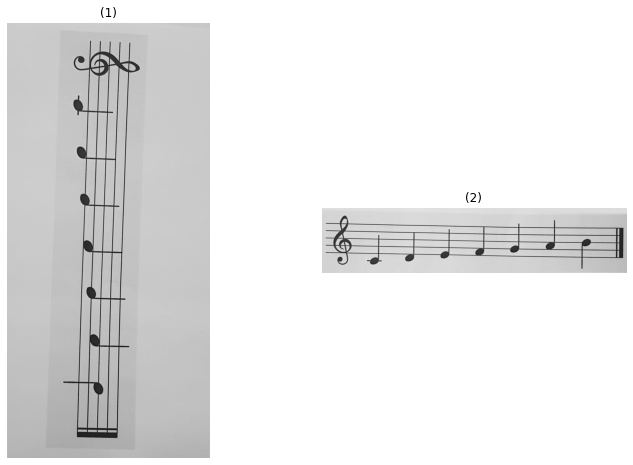

---------------------------------------------------------
time: 0.3031914234161377 seconds


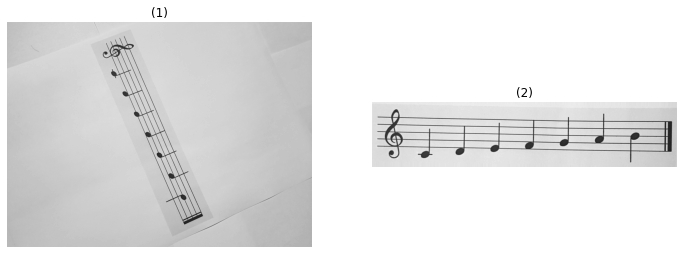

---------------------------------------------------------
time: 0.36701130867004395 seconds


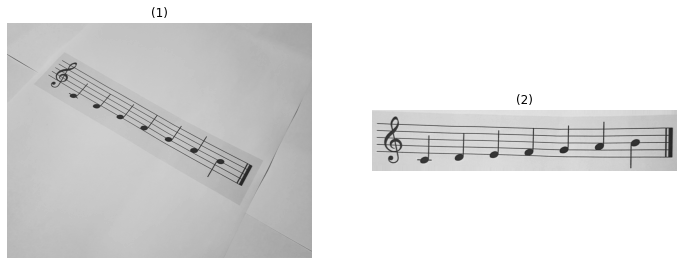

---------------------------------------------------------
time: 0.5415518283843994 seconds


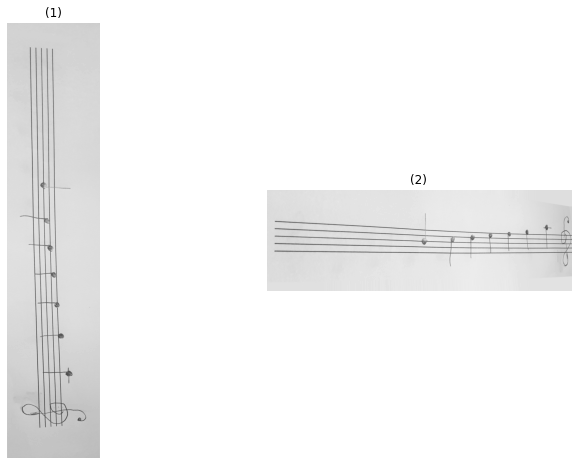

---------------------------------------------------------
time: 0.5595352649688721 seconds


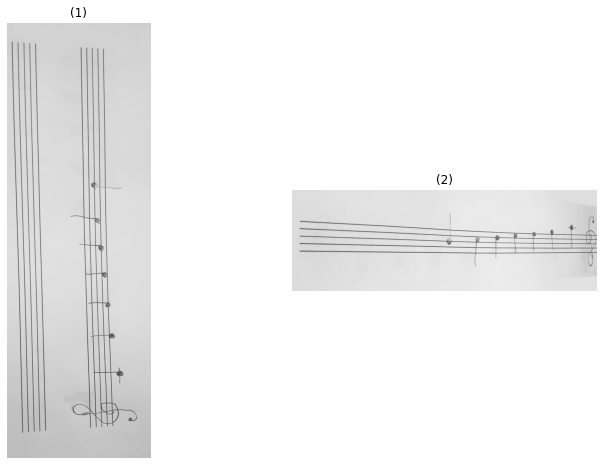

---------------------------------------------------------
time: 0.690147876739502 seconds


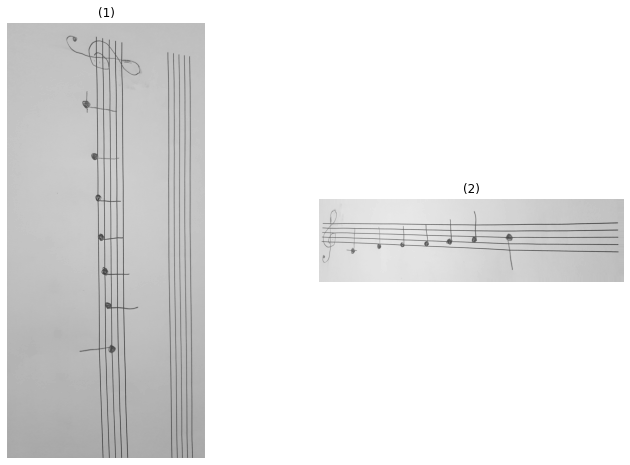

---------------------------------------------------------
time: 0.46473073959350586 seconds


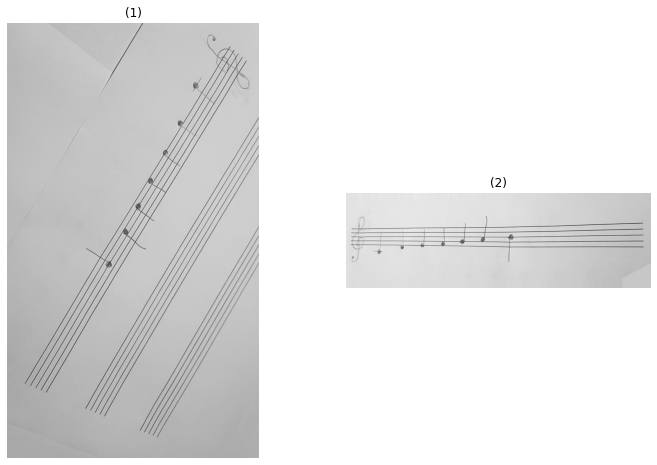

---------------------------------------------------------
time: 0.12964797019958496 seconds


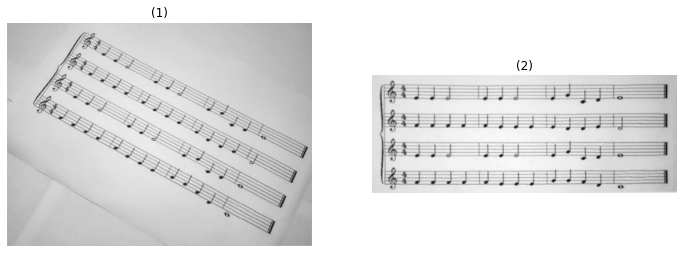

---------------------------------------------------------
time: 0.03490710258483887 seconds


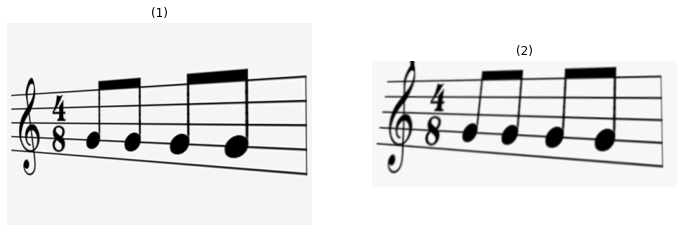

---------------------------------------------------------
time: 0.03490781784057617 seconds


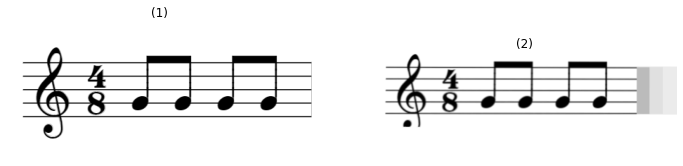

---------------------------------------------------------
time: 0.13859891891479492 seconds


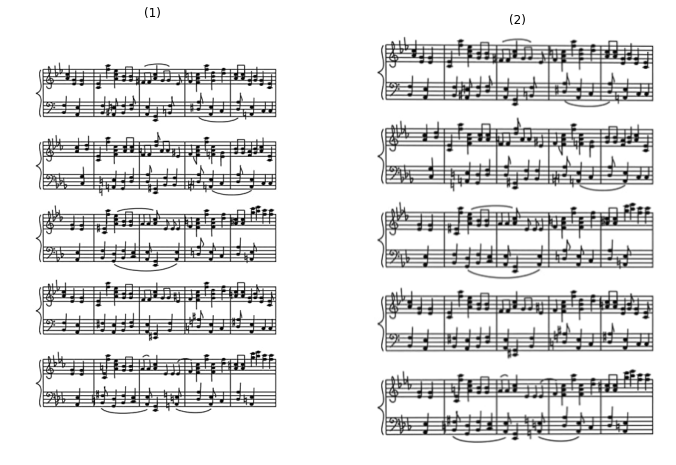

---------------------------------------------------------
time: 0.11170244216918945 seconds


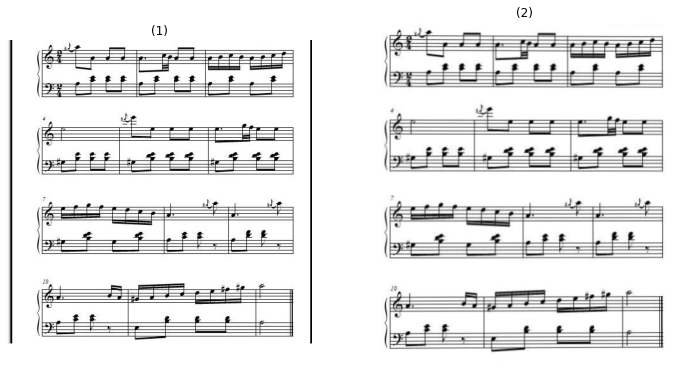

---------------------------------------------------------
time: 0.04588031768798828 seconds


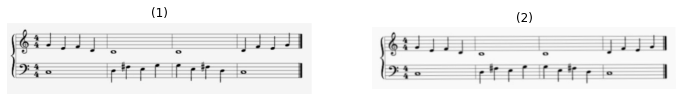

---------------------------------------------------------
time: 0.10668325424194336 seconds


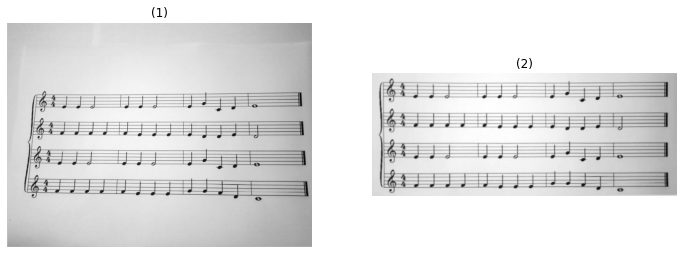

---------------------------------------------------------
time: 0.22440266609191895 seconds


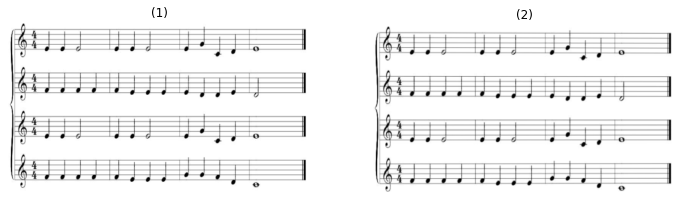

---------------------------------------------------------
time: 0.11273074150085449 seconds


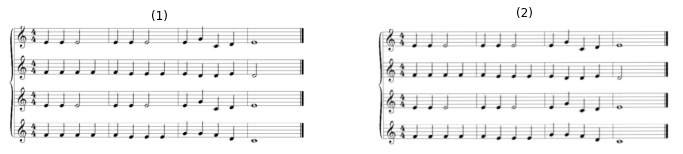

---------------------------------------------------------
time: 0.09471511840820312 seconds


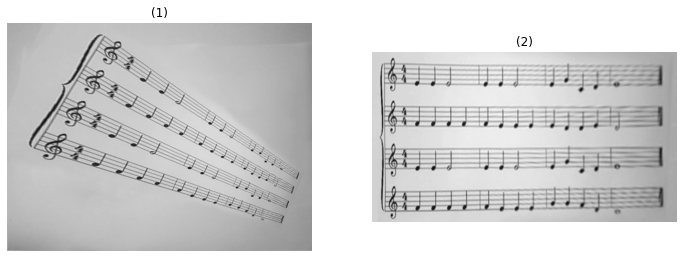

---------------------------------------------------------
time: 0.07077813148498535 seconds


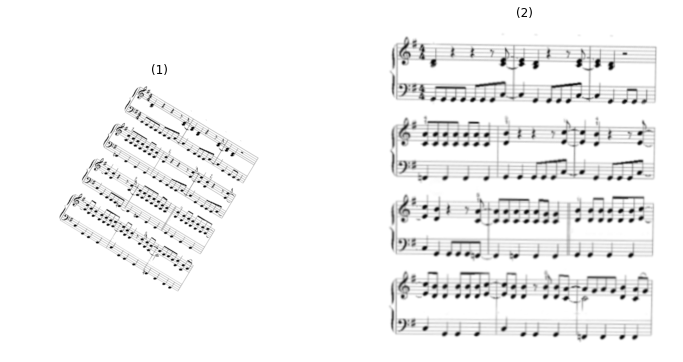

---------------------------------------------------------
time: 0.06682324409484863 seconds


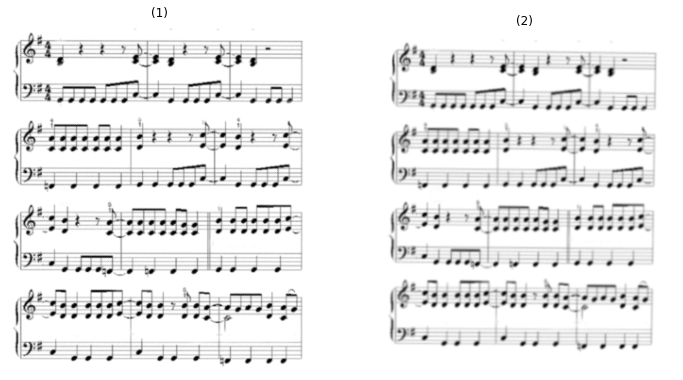

---------------------------------------------------------
time: 0.13962459564208984 seconds


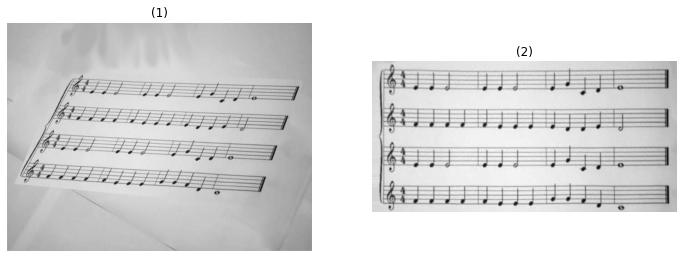

---------------------------------------------------------


In [8]:
images = load_images_from_folder("../test_cases/")

# show_images([rotateImage(images[0])])

for img in images:
    start_time = time.time()
    area = rotateImage(img)
    print("time: %s seconds" % (time.time() - start_time))
    show_images([img, area])
    print("---------------------------------------------------------")
    